In [1]:
from IPython.display import Image

# 1. Sharpe Ratio

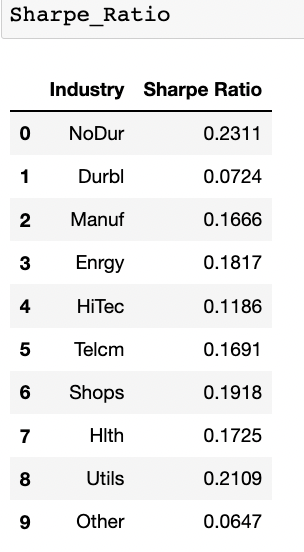

In [2]:
Image(filename = '1.png',width = 300, height = 300)

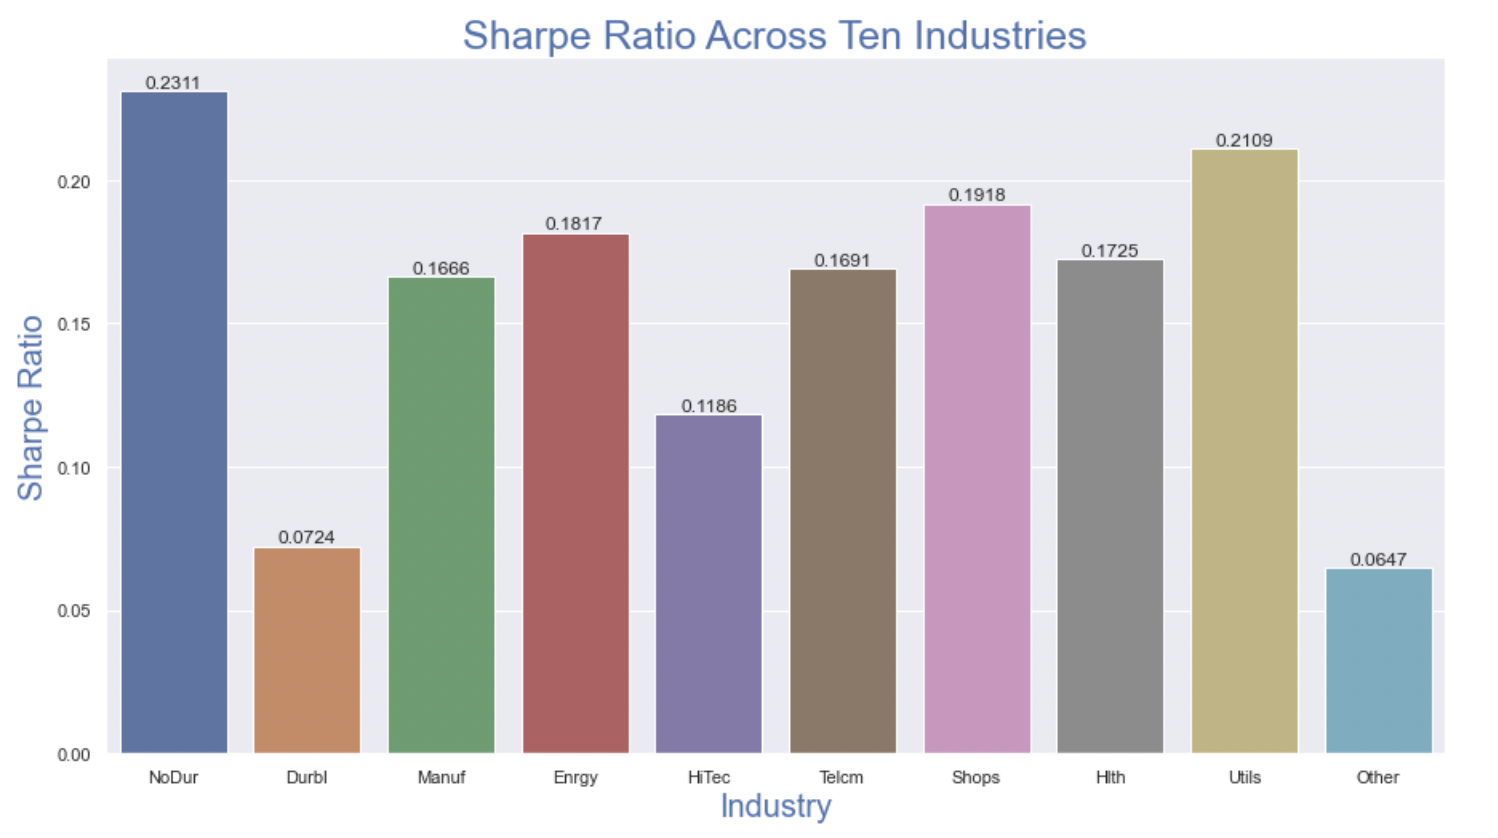

In [3]:
Image(filename = '1.1.png',width = 800, height = 800)

# 1.1 Economic Significance of Sharpe Ratio

### Sharpe Ratio measures risk-adjusted return for a asset or a portfolio. Higher sharpe ratio means the return of the asset or portfolio is highly sensitive to the risk underlying it. However, both systematic and idiosycratic risks are involved in the denominator¶

# 2. Sortino Ratio

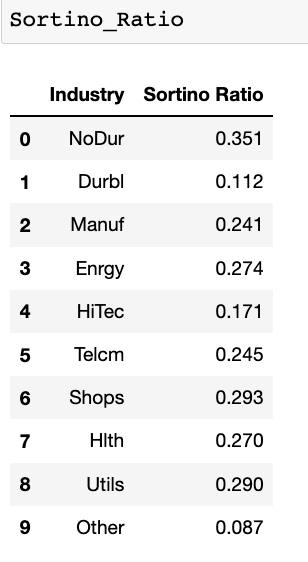

In [4]:
Image(filename = '2.png',width = 300, height = 300)

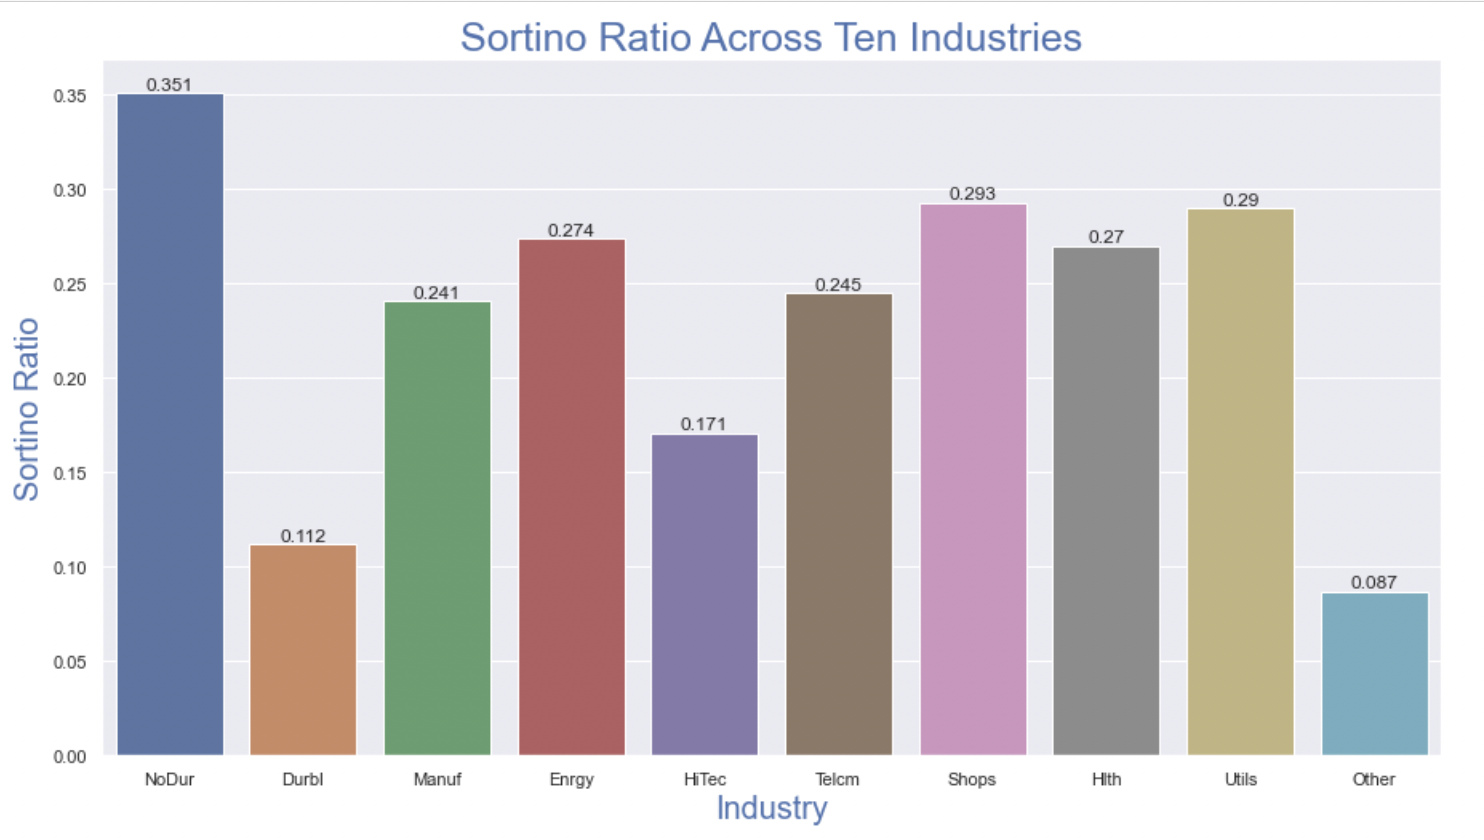

In [5]:
Image(filename = '2.1.png',width = 800, height = 800)

# 2.1 Economic Significance of Sortino Ratio

### Sortino Ratio measures the down-side risk adjusted return for a asset or portfolio, it shows how sensitive of the return of the asset of portfolio related to the downside risk of the return.

# 3. Treynor Ratio

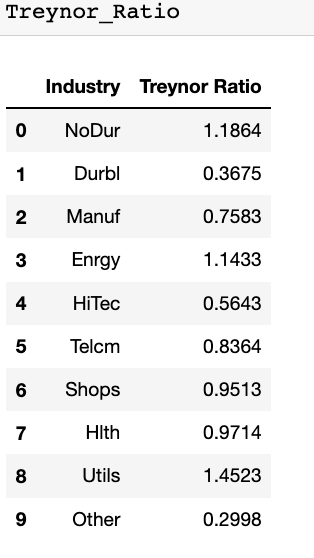

In [6]:
Image(filename = '3.png', width = 300, height = 300)

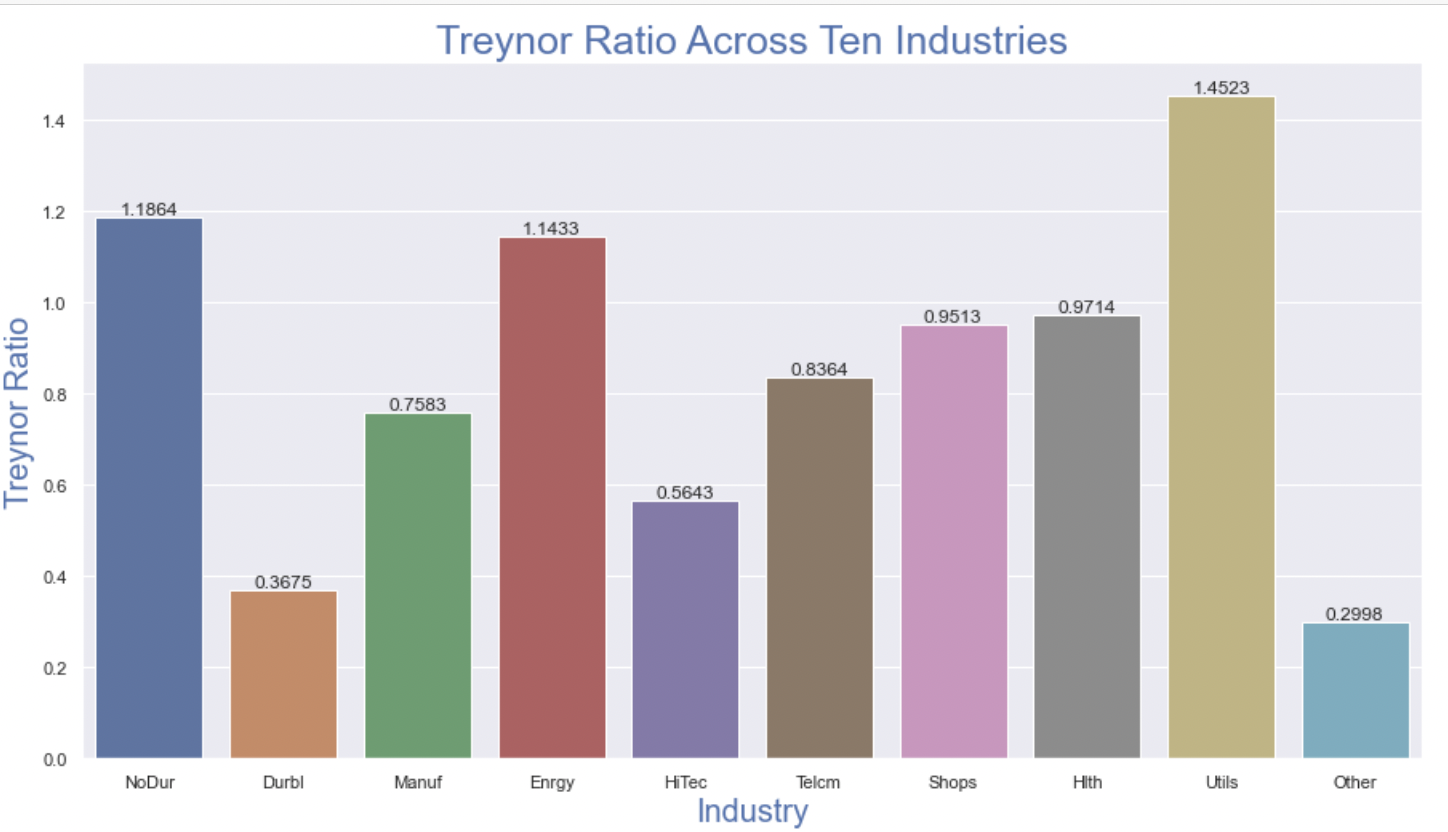

In [7]:
Image(filename = '3.1.png',width = 800, height = 800)

# 3.1 Economic Significance of Treynor Ratio

### Treynor Ratio measures the systematic risk adjusted returns of a asset or portfolio. We can use the ratio to compare the performance of individual investment to diversified portfolio. However, it fails to take account for other systematic risks.

# 4. Jensen's Alpha

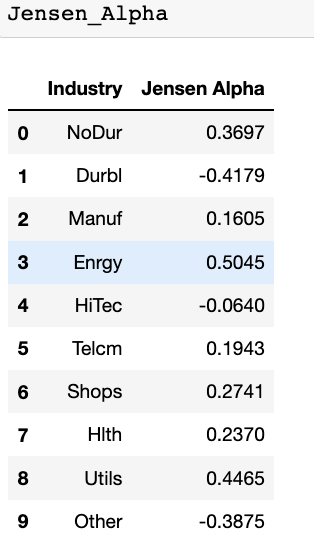

In [8]:
Image(filename = '4.png', width = 300, height = 300)

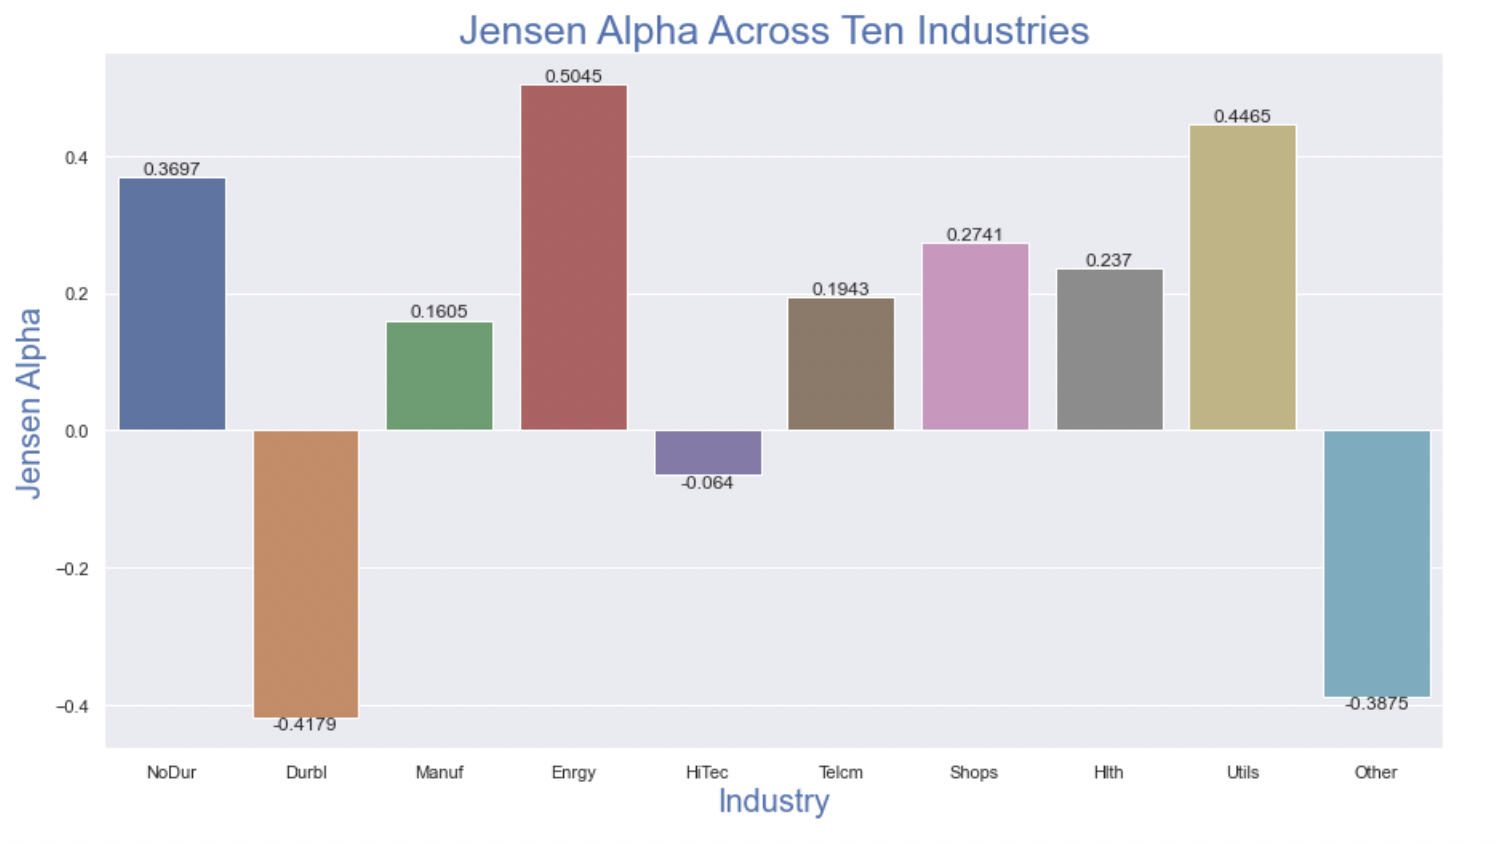

In [9]:
Image(filename = '4.1.png',width = 800, height = 800)

# 5. Three Factor Alpha

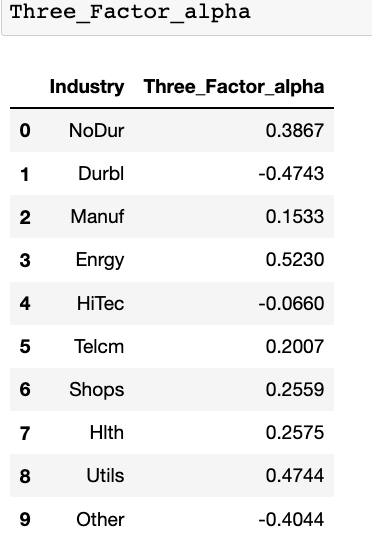

In [10]:
Image(filename = '5.png', width = 300, height = 300)

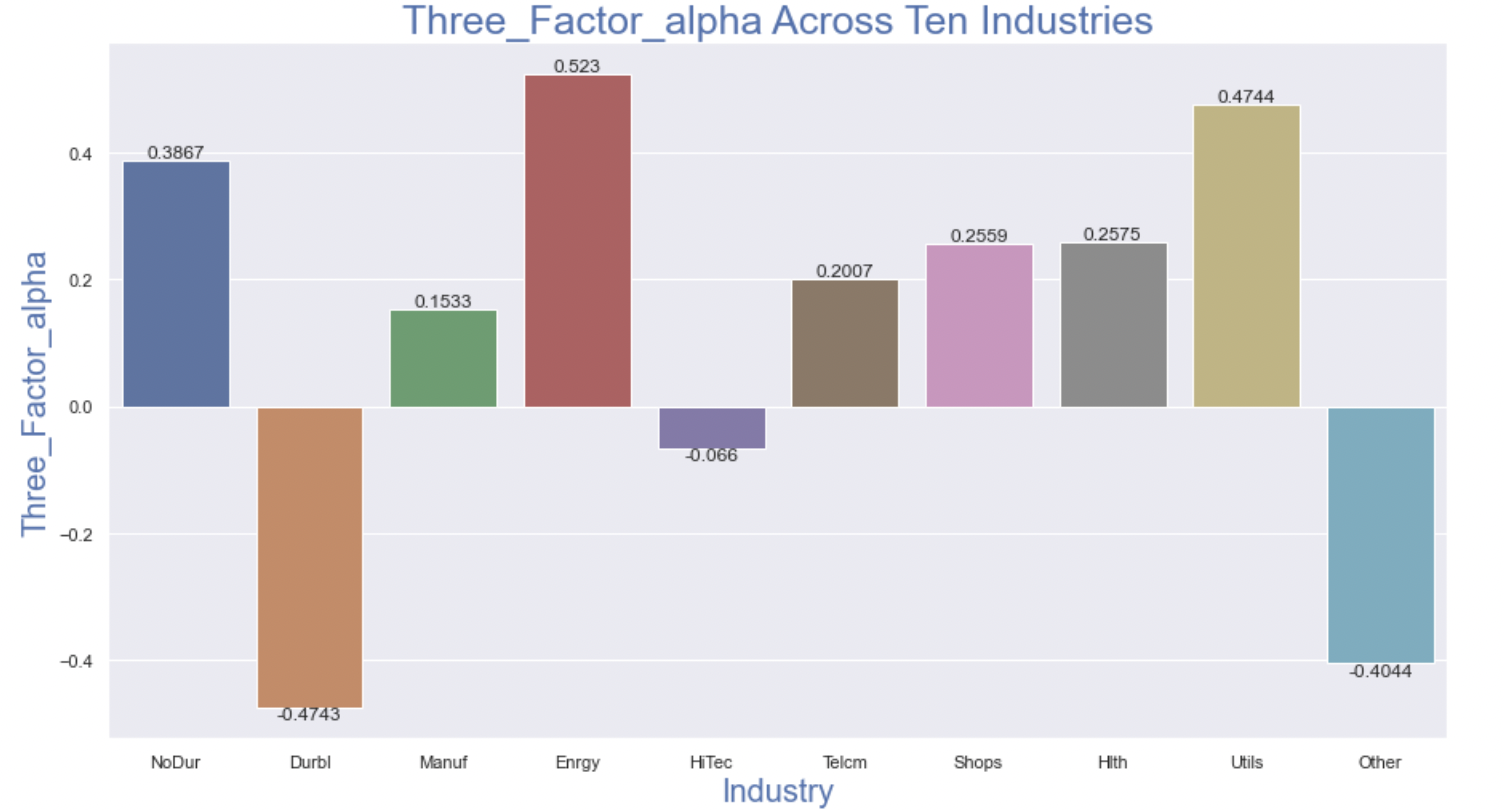

In [11]:
Image(filename = '5.1.png',width = 800, height = 800)

# 6. Combined Performance Metrix

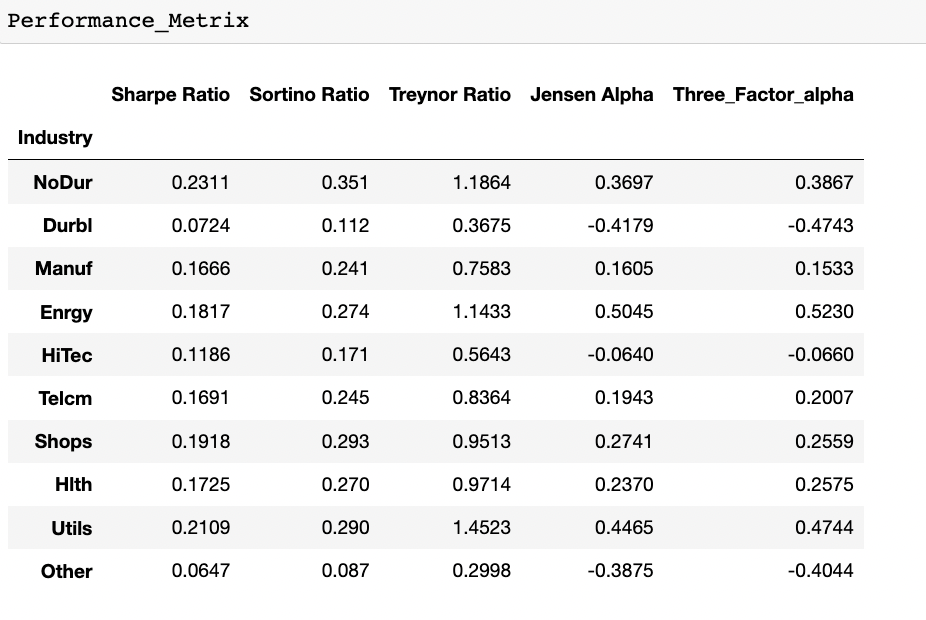

In [12]:
Image(filename = '6.png', width = 700, height = 700)

# Coding Part

In [13]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style = 'darkgrid')

from scipy import stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [14]:
risk_factor = pd.read_excel('Risk_Factors.xlsx', index_col = 0)

In [15]:
risk_factor.head()

Rf  Rm-Rf   SMB   HML
Date                           
200401  0.07   2.15  2.67  1.55
200402  0.06   1.40 -1.17  0.45
200403  0.09  -1.32  1.84  0.07
200404  0.08  -1.83 -2.59 -1.67
200405  0.06   1.17 -0.10 -0.33

In [16]:
industry_portfolio = pd.read_excel('/Users/jiaminglv/Desktop/jupy files/mqf financial engineering/Asset Pricing HW/Industry_Portfolios.xlsx', index_col = 0)

In [17]:
industry_portfolio.head()

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
Date                                                                       
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76
200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   1.86

In [18]:
combined_data = pd.concat([industry_portfolio,risk_factor], axis = 1)

combined_data.head()

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other  \
Date                                                                          
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88   
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16   
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63   
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76   
200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   1.86   

          Rf  Rm-Rf   SMB   HML  
Date                             
200401  0.07   2.15  2.67  1.55  
200402  0.06   1.40 -1.17  0.45  
200403  0.09  -1.32  1.84  0.07  
200404  0.08  -1.83 -2.59 -1.67  
200405  0.06   1.17 -0.10 -0.33

In [19]:
combined_data['Rf']

Date
200401    0.07
200402    0.06
200403    0.09
200404    0.08
200405    0.06
          ... 
201308    0.00
201309    0.00
201310    0.00
201311    0.00
201312    0.00
Name: Rf, Length: 120, dtype: float64

In [20]:
excess_return = combined_data.iloc[:,:10].sub(combined_data.loc[:,'Rf'], axis = 0)

excess_return

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
Date                                                                       
200401  -0.01  -1.14  -0.69   0.37   4.46   1.34   0.38  3.02   1.85   2.81
200402   4.19  -0.13   1.89   4.63  -2.98  -0.58   6.03  0.83   2.01   2.10
200403  -0.18  -1.24  -0.36  -0.22  -2.64  -2.16   0.20 -4.05   1.04  -0.72
200404   1.34   2.22  -0.25   2.44  -4.99  -0.56  -2.78  3.46  -3.63  -3.84
200405  -1.95  -1.70   1.55   0.33   4.79  -3.01   0.24 -0.48   1.22   1.80
...       ...    ...    ...    ...    ...    ...    ...   ...    ...    ...
201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43  -3.66
201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   3.83
201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   3.87
201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   4.74
201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   3.11

[120 rows x 10 columns]

In [21]:
mean_std = pd.concat([excess_return.mean(),excess_return.std()], keys = ['mean','std'], axis = 1)
mean_std

mean       std
NoDur  0.775583  3.356069
Durbl  0.606083  8.376449
Manuf  0.885583  5.315101
Enrgy  1.103917  6.075208
HiTec  0.639000  5.390019
Telcm  0.754167  4.460826
Shops  0.789083  4.115095
Hlth   0.656583  3.805630
Utils  0.779917  3.697203
Other  0.361833  5.593090

# 1. Sharpe Ratio

In [22]:
Sharpe_Ratio = round(mean_std['mean'] / mean_std['std'],4)

Sharpe_Ratio = pd.DataFrame(Sharpe_Ratio)

Sharpe_Ratio = Sharpe_Ratio.reset_index()

Sharpe_Ratio = Sharpe_Ratio.rename(columns = {'index':'Industry',0:'Sharpe Ratio'})

Sharpe_Ratio

Industry  Sharpe Ratio
0    NoDur        0.2311
1    Durbl        0.0724
2    Manuf        0.1666
3    Enrgy        0.1817
4    HiTec        0.1186
5    Telcm        0.1691
6    Shops        0.1918
7     Hlth        0.1725
8    Utils        0.2109
9    Other        0.0647

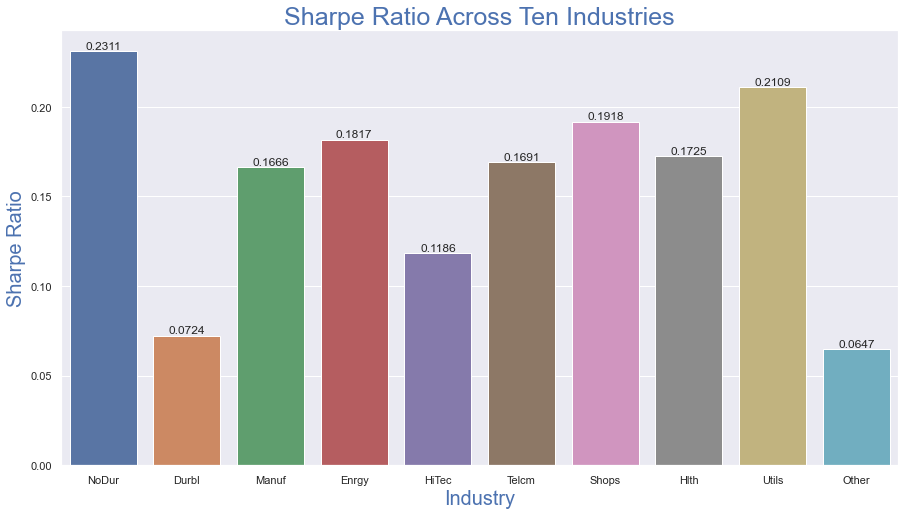

In [23]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data = Sharpe_Ratio, x = 'Industry', y = 'Sharpe Ratio')

ax.set_title('Sharpe Ratio Across Ten Industries', fontsize = 25, color = 'b')

ax.set_xlabel('Industry', fontsize = 20, color = 'b')

ax.set_ylabel('Sharpe Ratio', fontsize = 20, color = 'b')

ax.bar_label(ax.containers[0])

plt.show()

# 1.1 Economic Significance of Sharpe Ratio

## Sharpe Ratio measures risk-adjusted return for a asset or a portfolio. Higher sharpe ratio means the return of the asset or portfolio is highly sensitive to the risk underlying it. However, both systematic and idiosycratic risks are involved in the denominator

# 2. Sortino Ratio

In [24]:
negative_return_square = excess_return[excess_return <0] **2
negative_return_square = negative_return_square.fillna(0)
Semi_Std = negative_return_square.mean()**0.5
Semi_Std = pd.DataFrame(Semi_Std, columns = ['Standard Deviation'])
Semi_Std

Standard Deviation
NoDur            2.210873
Durbl            5.413075
Manuf            3.670664
Enrgy            4.034612
HiTec            3.745156
Telcm            3.078986
Shops            2.692828
Hlth             2.429146
Utils            2.688964
Other            4.142294

In [25]:
Sortino_Ratio = round(mean_std['mean']/Semi_Std['Standard Deviation'], 3)

Sortino_Ratio = pd.DataFrame(Sortino_Ratio)

Sortino_Ratio = Sortino_Ratio.reset_index()

Sortino_Ratio.columns = ['Industry','Sortino Ratio']

Sortino_Ratio

Industry  Sortino Ratio
0    NoDur          0.351
1    Durbl          0.112
2    Manuf          0.241
3    Enrgy          0.274
4    HiTec          0.171
5    Telcm          0.245
6    Shops          0.293
7     Hlth          0.270
8    Utils          0.290
9    Other          0.087

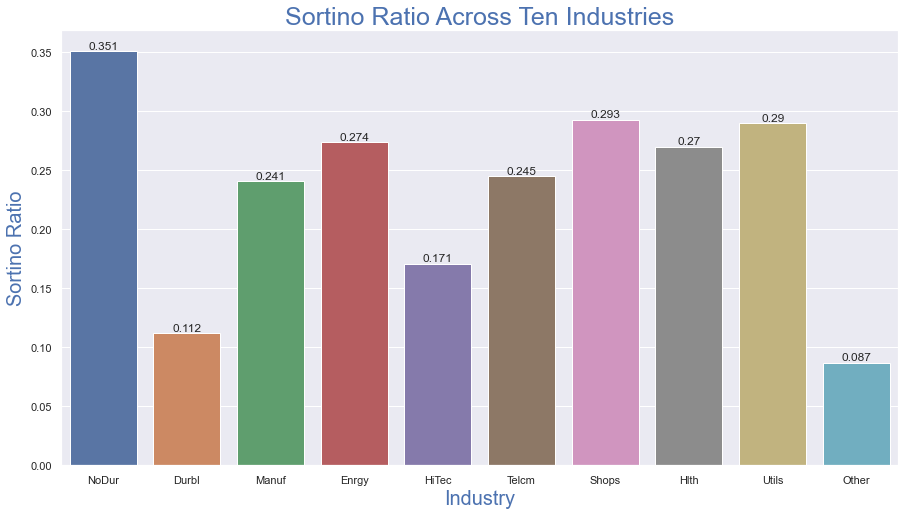

In [26]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data = Sortino_Ratio, x = 'Industry', y = 'Sortino Ratio')

ax.set_title('Sortino Ratio Across Ten Industries', fontsize = 25, color = 'b')

ax.set_xlabel('Industry', fontsize = 20, color = 'b')

ax.set_ylabel('Sortino Ratio', fontsize = 20, color = 'b')

ax.bar_label(ax.containers[0])

plt.show()

# 2.1 Economic Significance of Sortino Ratio


## Sortino Ratio measures the down-side risk adjusted return for a asset or portfolio, it shows how sensitive of the return of the asset of portfolio related to the downside risk of the return.

# 3.Treynor Ratio

In [27]:
data = pd.concat([excess_return,risk_factor], axis = 1)

data

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other  \
Date                                                                          
200401  -0.01  -1.14  -0.69   0.37   4.46   1.34   0.38  3.02   1.85   2.81   
200402   4.19  -0.13   1.89   4.63  -2.98  -0.58   6.03  0.83   2.01   2.10   
200403  -0.18  -1.24  -0.36  -0.22  -2.64  -2.16   0.20 -4.05   1.04  -0.72   
200404   1.34   2.22  -0.25   2.44  -4.99  -0.56  -2.78  3.46  -3.63  -3.84   
200405  -1.95  -1.70   1.55   0.33   4.79  -3.01   0.24 -0.48   1.22   1.80   
...       ...    ...    ...    ...    ...    ...    ...   ...    ...    ...   
201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43  -3.66   
201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   3.83   
201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   3.87   
201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   4.74   
201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   3.11   

          Rf  Rm-Rf   SMB   HML  
Date                             
200401  0.07   2.15  2.67  1.55  
200402  0.06   1.40 -1.17  0.45  
200403  0.09  -1.32  1.84  0.07  
200404  0.08  -1.83 -2.59 -1.67  
200405  0.06   1.17 -0.10 -0.33  
...      ...    ...   ...   ...  
201308  0.00  -2.69  0.29 -2.46  
201309  0.00   3.76  2.85 -1.59  
201310  0.00   4.17 -1.56  1.31  
201311  0.00   3.12  1.34 -0.33  
201312  0.00   2.81 -0.43 -0.15  

[120 rows x 14 columns]

In [28]:
def func(Industry):
    return stats.linregress(data['Rm-Rf'],data[Industry])[:2]
beta_alpha = map(func,list(excess_return.columns))

beta_alpha = pd.DataFrame(beta_alpha, columns = ['beta','alpha'], index = list(excess_return.columns))

beta_alpha 

beta     alpha
NoDur  0.653744  0.369717
Durbl  1.649374 -0.417903
Manuf  1.167929  0.160494
Enrgy  0.965527  0.504485
HiTec  1.132387 -0.064024
Telcm  0.901721  0.194348
Shops  0.829515  0.274093
Hlth   0.675890  0.236968
Utils  0.537009  0.446523
Other  1.206992 -0.387508

In [29]:
Treynor_Ratio = round(mean_std['mean'] / beta_alpha['beta'],4)
Treynor_Ratio = pd.DataFrame(Treynor_Ratio)
Treynor_Ratio = Treynor_Ratio.reset_index()
Treynor_Ratio.columns = ['Industry','Treynor Ratio']
Treynor_Ratio

Industry  Treynor Ratio
0    NoDur         1.1864
1    Durbl         0.3675
2    Manuf         0.7583
3    Enrgy         1.1433
4    HiTec         0.5643
5    Telcm         0.8364
6    Shops         0.9513
7     Hlth         0.9714
8    Utils         1.4523
9    Other         0.2998

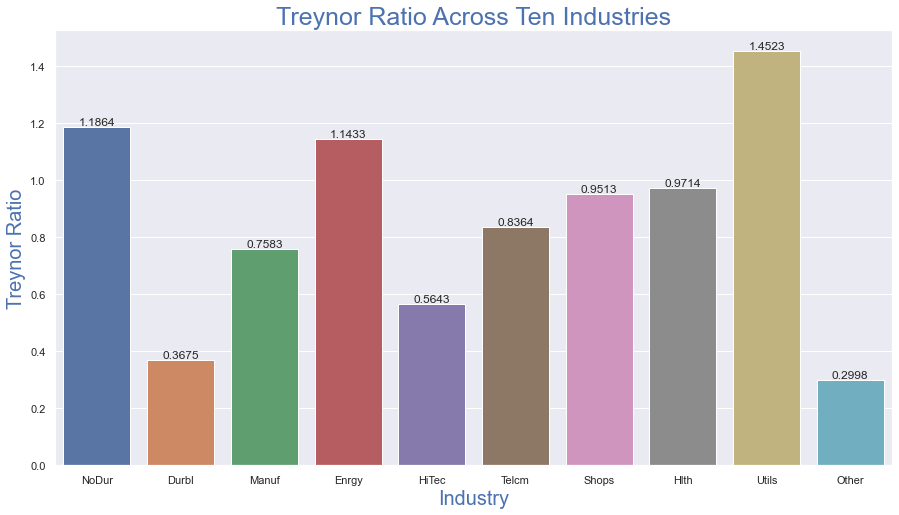

In [30]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data = Treynor_Ratio, x = 'Industry', y = 'Treynor Ratio')

ax.set_title('Treynor Ratio Across Ten Industries', fontsize = 25, color = 'b')

ax.set_xlabel('Industry', fontsize = 20, color = 'b')

ax.set_ylabel('Treynor Ratio', fontsize = 20, color = 'b')

ax.bar_label(ax.containers[0])

plt.show()

# 3.1 Economic Significance of Treynor Ratio

## Treynor Ratio measures the systematic risk adjusted returns of a asset or portfolio. We can use the ratio to compare the performance of individual investment to diversified portfolio. However, it fails to take account for other systematic risks.

# 4.Jensen's Alpha

In [31]:
Jensen_Alpha = round(beta_alpha['alpha'],4)
Jensen_Alpha = pd.DataFrame(Jensen_Alpha)
Jensen_Alpha = Jensen_Alpha.reset_index()
Jensen_Alpha.columns = ['Industry','Jensen Alpha']
Jensen_Alpha

Industry  Jensen Alpha
0    NoDur        0.3697
1    Durbl       -0.4179
2    Manuf        0.1605
3    Enrgy        0.5045
4    HiTec       -0.0640
5    Telcm        0.1943
6    Shops        0.2741
7     Hlth        0.2370
8    Utils        0.4465
9    Other       -0.3875

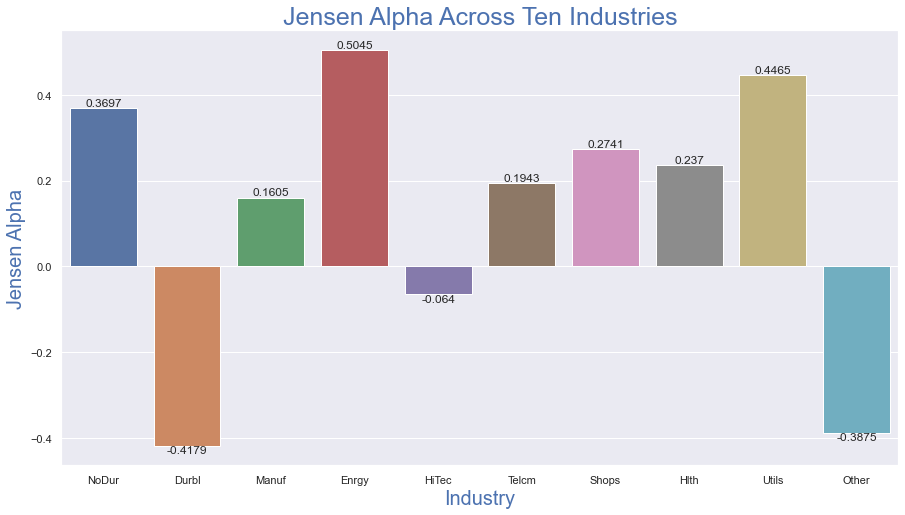

In [32]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data = Jensen_Alpha, x = 'Industry', y = 'Jensen Alpha')

ax.set_title('Jensen Alpha Across Ten Industries', fontsize = 25, color = 'b')

ax.set_xlabel('Industry', fontsize = 20, color = 'b')

ax.set_ylabel('Jensen Alpha', fontsize = 20, color = 'b')

ax.bar_label(ax.containers[0])

plt.show()

# 5.Three Factor Alpha

In [33]:
data

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other  \
Date                                                                          
200401  -0.01  -1.14  -0.69   0.37   4.46   1.34   0.38  3.02   1.85   2.81   
200402   4.19  -0.13   1.89   4.63  -2.98  -0.58   6.03  0.83   2.01   2.10   
200403  -0.18  -1.24  -0.36  -0.22  -2.64  -2.16   0.20 -4.05   1.04  -0.72   
200404   1.34   2.22  -0.25   2.44  -4.99  -0.56  -2.78  3.46  -3.63  -3.84   
200405  -1.95  -1.70   1.55   0.33   4.79  -3.01   0.24 -0.48   1.22   1.80   
...       ...    ...    ...    ...    ...    ...    ...   ...    ...    ...   
201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43  -3.66   
201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   3.83   
201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   3.87   
201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   4.74   
201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   3.11   

          Rf  Rm-Rf   SMB   HML  
Date                             
200401  0.07   2.15  2.67  1.55  
200402  0.06   1.40 -1.17  0.45  
200403  0.09  -1.32  1.84  0.07  
200404  0.08  -1.83 -2.59 -1.67  
200405  0.06   1.17 -0.10 -0.33  
...      ...    ...   ...   ...  
201308  0.00  -2.69  0.29 -2.46  
201309  0.00   3.76  2.85 -1.59  
201310  0.00   4.17 -1.56  1.31  
201311  0.00   3.12  1.34 -0.33  
201312  0.00   2.81 -0.43 -0.15  

[120 rows x 14 columns]

In [34]:
Three_Factor_alpha = []

for i in excess_return.columns:
    x = np.column_stack((data['Rm-Rf'], data['SMB'], data['HML']))
    X = sm.add_constant(x)
    y = data[i]
    Model = sm.OLS(y,X).fit()
    Three_Factor_alpha.append(round(Model.params[0],4))
Three_Factor_alpha = pd.DataFrame(Three_Factor_alpha)
Three_Factor_alpha = Three_Factor_alpha.rename(index = lambda x: list(excess_return)[x])
Three_Factor_alpha.columns = ['Three_Factor_alpha']
Three_Factor_alpha = Three_Factor_alpha.reset_index()
Three_Factor_alpha = Three_Factor_alpha.rename(columns = {'index':'Industry'})
Three_Factor_alpha

Industry  Three_Factor_alpha
0    NoDur              0.3867
1    Durbl             -0.4743
2    Manuf              0.1533
3    Enrgy              0.5230
4    HiTec             -0.0660
5    Telcm              0.2007
6    Shops              0.2559
7     Hlth              0.2575
8    Utils              0.4744
9    Other             -0.4044

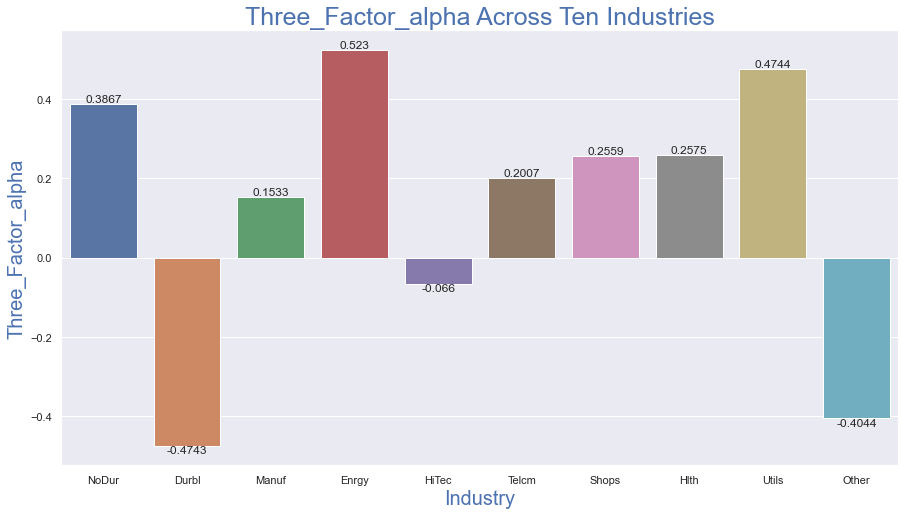

In [35]:
plt.figure(figsize = (15,8))

ax = sns.barplot(data = Three_Factor_alpha , x = 'Industry', y = 'Three_Factor_alpha')

ax.set_title('Three_Factor_alpha Across Ten Industries', fontsize = 25, color = 'b')

ax.set_xlabel('Industry', fontsize = 20, color = 'b')

ax.set_ylabel('Three_Factor_alpha', fontsize = 20, color = 'b')

ax.bar_label(ax.containers[0])

plt.show()

In [36]:
list_Industry = [Sharpe_Ratio,Sortino_Ratio,Treynor_Ratio,Jensen_Alpha,Three_Factor_alpha]

for i in list_Industry:
    i.set_index('Industry',inplace = True)

In [37]:
Performance_Metrix = pd.concat([Sharpe_Ratio,Sortino_Ratio,Treynor_Ratio,Jensen_Alpha,Three_Factor_alpha], axis = 1)

Performance_Metrix 

Sharpe Ratio  Sortino Ratio  Treynor Ratio  Jensen Alpha  \
Industry                                                             
NoDur           0.2311          0.351         1.1864        0.3697   
Durbl           0.0724          0.112         0.3675       -0.4179   
Manuf           0.1666          0.241         0.7583        0.1605   
Enrgy           0.1817          0.274         1.1433        0.5045   
HiTec           0.1186          0.171         0.5643       -0.0640   
Telcm           0.1691          0.245         0.8364        0.1943   
Shops           0.1918          0.293         0.9513        0.2741   
Hlth            0.1725          0.270         0.9714        0.2370   
Utils           0.2109          0.290         1.4523        0.4465   
Other           0.0647          0.087         0.2998       -0.3875   

          Three_Factor_alpha  
Industry                      
NoDur                 0.3867  
Durbl                -0.4743  
Manuf                 0.1533  
Enrgy                 0.5230  
HiTec                -0.0660  
Telcm                 0.2007  
Shops                 0.2559  
Hlth                  0.2575  
Utils                 0.4744  
Other                -0.4044

In [62]:
Performance_Metrix.reset_index()

Industry  Sharpe Ratio  Sortino Ratio  Treynor Ratio  Jensen Alpha  \
0    NoDur        0.2311          0.351         1.1864        0.3697   
1    Durbl        0.0724          0.112         0.3675       -0.4179   
2    Manuf        0.1666          0.241         0.7583        0.1605   
3    Enrgy        0.1817          0.274         1.1433        0.5045   
4    HiTec        0.1186          0.171         0.5643       -0.0640   
5    Telcm        0.1691          0.245         0.8364        0.1943   
6    Shops        0.1918          0.293         0.9513        0.2741   
7     Hlth        0.1725          0.270         0.9714        0.2370   
8    Utils        0.2109          0.290         1.4523        0.4465   
9    Other        0.0647          0.087         0.2998       -0.3875   

   Three_Factor_alpha  
0              0.3867  
1             -0.4743  
2              0.1533  
3              0.5230  
4             -0.0660  
5              0.2007  
6              0.2559  
7              0.2575  
8              0.4744  
9             -0.4044

In [3]:
import pandas as pd

In [4]:
>>> s = pd.Series([1, 2, 3, 4], name='foo',
...               index=pd.Index(['a', 'b', 'c', 'd'], name='idx'))
s

idx
a    1
b    2
c    3
d    4
Name: foo, dtype: int64

In [5]:
s.reset_index()

idx  foo
0   a    1
1   b    2
2   c    3
3   d    4

In [7]:
s.reset_index(name = 'a')

idx  a
0   a  1
1   b  2
2   c  3
3   d  4

In [12]:
s = pd.DataFrame(s)

s

foo
idx     
a      1
b      2
c      3
d      4